# EDA with python and applying Logistic Regression

EDA is used for analysing and understanding a data. So, if we have a dataset we have to spend most of the time in knowing the data and spending time in preprocessing.

# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlibinline

# The Data

We are using titanic dataset from kaggle to perform all the EDA steps

In [66]:
train = pd.read_csv("titanic_train.csv")

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Goal:

Based on the data we need to predict if passengers have survived or not

# Exploratory Data Analysis

## Missing Data:

We can use the isnull function and seaborn library to find the misssing data

In [68]:
train.isnull()

#this is not a great way to evaluate if we have missing data as only few columns are displayed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [69]:
#using the seaborn library
#here we dont want which rows or index will have NaN values

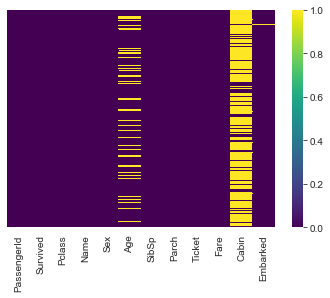

In [70]:
sns.heatmap(train.isnull(), yticklabels=False,cmap="viridis")

#here yticklabels=False implies we do not need rows or data which have NaN values
#cmap="viridis" gives the color yellow to denote NaN values in purple heatmap
#cbar = False will not provide the index on the right

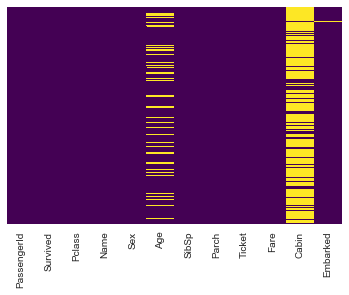

In [71]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap="viridis")

#so we see most NaN values are availble in column Age and Cabin

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data.

In [72]:
#lets check what is the count of people who survived using the countplot
#here we use set_style('whitegrid')to give background of graph as whitegrid and easily find the count with lines(grid) drawn in background
#here x,y is used to tell about the columns or attributes we want to check

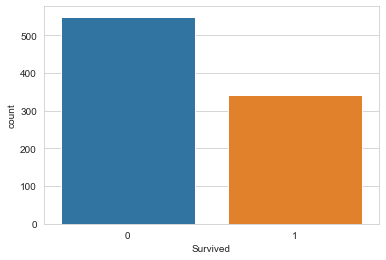

In [73]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

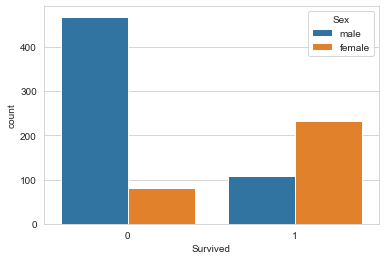

In [74]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Sex')

In [75]:
#Here we can see out of total people who have not survived most of the people are male

In [76]:
#Passenger class 'PClass'
#1 means first class or rich passengers
#2 means Second class or middleclass passengers
#3 #1 means third class or poor passengers

#now analysisng the data above based on pclass

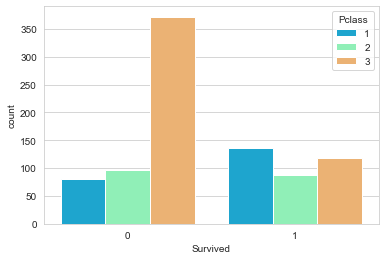

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Pclass',palette='rainbow')

D:\Drivers\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


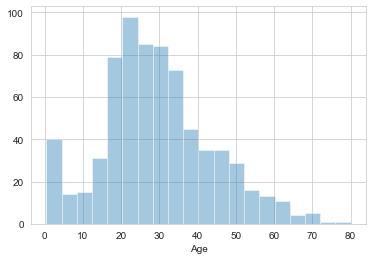

In [78]:
#checking the distribution of Age column in train data using distplot

sns.distplot(train['Age'],kde=False)

#we can see it follows normal distribution

D:\Drivers\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


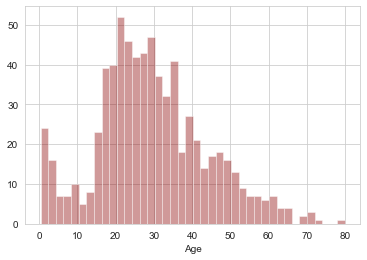

In [79]:
#we also know age has some Nan values so dropping NaN values and drawing the distplot



sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

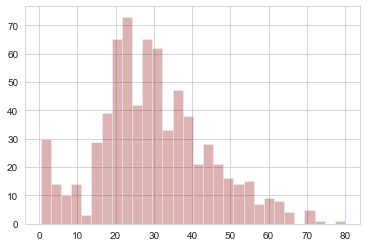

In [80]:
#same thing as above
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

In [81]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

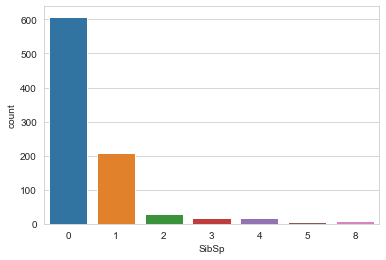

In [82]:
sns.countplot(x='SibSp',data=train)

#checking the cout of sibling or spouses in column SibSp

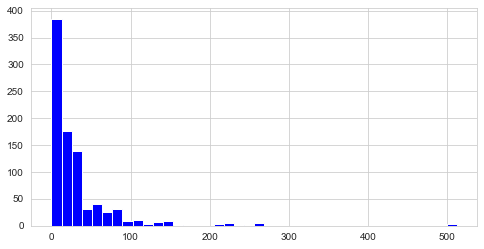

In [83]:
train['Fare'].hist(color='blue',bins=40,figsize=(8,4))

In [84]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Data Cleaning

We know that we have missing values in 'Age' and 'Cabin'.So we see the correlation between various numerical/ordinal fetures of data.

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

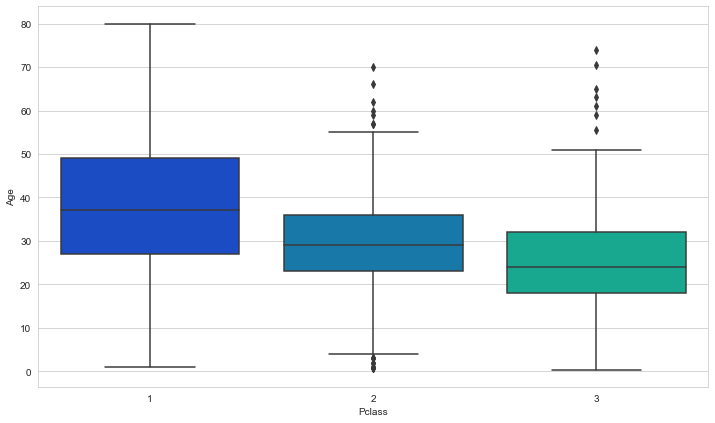

In [85]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

#with respect to Pclass and age they are negatively corelated we see what is the average age of people with respect to Pclass
#Here we will use boxplot
#average age of Pclass=1 or First Class passengers is 37(50th percentile values is average)
#average age of Pclass=1 or First Class passengers is 29
#average age of Pclass=1 or First Class passengers is 24


We can see the wealthier passengers in the higher classes(1st,2nd class Pclass=1,2) tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [86]:
#We will write a function impute_age which imputes age
#it has 2 columns (cols)
#column 1 is Age : Age = cols[0]
#column 2 is Passenger class Pclass Pclass =cols[1]
#if we find nan or null value is age:
#then we check which class the passenger belongs to and replace null by average age as below
#average age of Pclass=1 or First Class passengers is 37(50th percentile values is average)
#average age of Pclass=1 or First Class passengers is 29
#average age of Pclass=1 or First Class passengers is 24


In [87]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass ==2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

Now apply that function

In [88]:
#now we apply the function above and replace the column 'Age' with  missing values by the function we  described above
#we use the .apply method and call function impute_age
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

#axis= 1 means apply on rows permanently

Now let's check that heat map again to see age has missing values

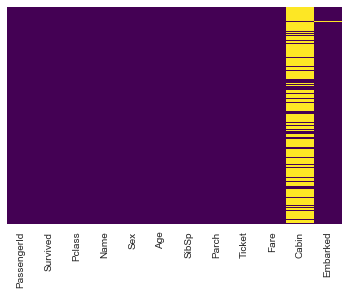

In [89]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.As many null values in cabin

In [90]:
train.drop('Cabin',axis=1,inplace=True)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


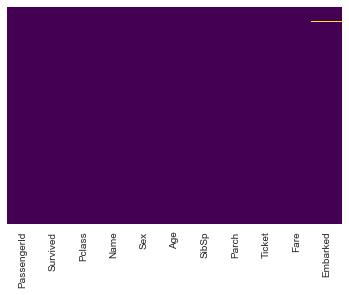

In [91]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [92]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [93]:
train.dropna(inplace=True)

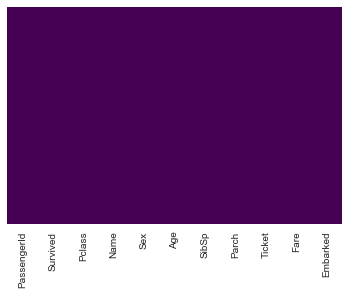

In [94]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [100]:
#we use pd.get_dummies to label encode categorical features to integer values
#i.e we can see below column 'Embarked' has three categores 's','c','q'.
#so we can encode it into two caategories 0 and 1 by applying dummy variable 
#1 means a category is present, 0 means category is absent
#no matter how many no's of category are present we can encode(dummy variable encoding) it in same maaner using pd.get_dummies
#we can drop first category as we have 0 and 1 indicators
#so category 0 for 'c' and 'Q' means category 'S' is present for embarked
#this way we escape trap of dummy_variable by droppping any one column(https://www.youtube.com/watch?v=5Q69P5r2u2A)


In [99]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [101]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [102]:
#I have label encoded "Sex" and "Embarked" columns with get_dummies and store it in varaibles sex and embark

sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [103]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


if you specify axis=1 you will be removing columns. If you specify axis=0 you will be removing rows from dataset

In [106]:
#now lets drop all the categorical features that is not needed
#if you specify axis=1 you will be removing columns. If you specify axis=0 you will be removing rows from dataset


train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [107]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


But we have to append the label-encoded categorical feature in line 102 and append it using pd.concat column

In [108]:
train = pd.concat([train,sex,embark],axis=1)

In [109]:
train.head()

#Here male denotes sex and column "Q"and "S" is for embark

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression model

Here we know the survived column is a dependent variable. So it is good to drop it

In [111]:
train.drop('Survived',axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,24.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [112]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Train Test Split

In [113]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x_train,x_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

#Here x value is = train.drop('Survived',axis=1)
#Here y value is =  train['Survived']
#test_size=0.30  means test data is 30% and train data is 70%


In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

D:\Drivers\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
predictions = logmodel.predict(x_test)

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
accuracy=confusion_matrix(y_test,predictions)

In [126]:
accuracy

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [127]:

from sklearn.metrics import accuracy_score

In [128]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8202247191011236

In [129]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

# Evaluation

We can check precision,recall,f1-score using classification report

In [130]:
from sklearn.metrics import classification_report

In [131]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

